<a href="https://colab.research.google.com/github/hyeonjusong410/DL.Basic/blob/main/Universal_Approximator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing packages

In [ ]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

### Model definition

```
# 코드로 형식 지정됨
```



In [ ]:
class Model(torch.nn.Module):
  def initialize_params(self, N: int):
    self.w = torch.nn.Parameter(torch.randn(1,N))
    self.b = torch.nn.Parameter(torch.randn(1, N))
    self.v = torch.nn.Parameter(torch.randn(N,1))

  def __init__(self, num_neurons: int):
    super(Model, self).__init__()
    self.initialize_params(num_neurons)

  def foward(self, x):
    out1 = torch.sigmoid(torch.matmul(x, self.w) + self.b)
    return torch.matmul(out1, self.v)

  @property
  def model_parameters(self):
    return (self.w, self.b, self.v)

  def load_parameters(self, w, b, v):
    self.w = torch.nn.Parameter(w)
    self.b = torch.nn.Parameter(b)
    self.v = torch.nn.Parameter(v)

### Loss function

In [ ]:
def loss_func(pred, true):
  mse = torch.mean((pred - true) ** 2 )
  return mse

### Gradient step

In [ ]:
def gradient_step(tensors, learning_rate):
  if isinstance(tensors, torch.Tensor):
    tensors = [tensors]

  for t in tensors:
    if t.grad is not None:
      t.data -= learning_rate * t.grad

### Data

In [ ]:
train_data = np.linspace(-2*np.pi, 2*np.pi, 1000).reshape(1000, 1)

def true_f(x):
  return np.cos(x)

neurons = 10
model = Model(num_neurons=neurons)

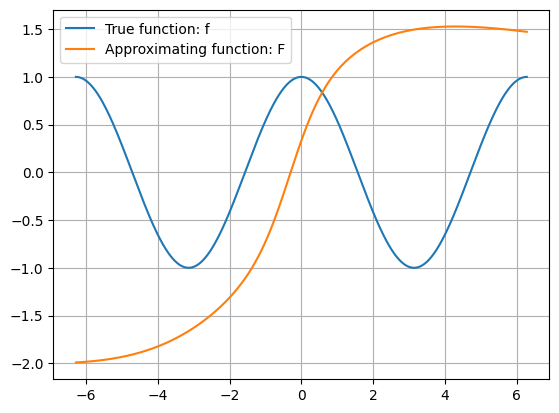

In [ ]:
train_data_tensor = torch.tensor(train_data, dtype=torch.float32)

# Create the plot
fig, ax = plt.subplots()
ax.plot(train_data, true_f(train_data), label="True function: f")
ax.plot(train_data, model(train_data_tensor).detach().numpy(), label="Approximating function: F")
ax.grid()
ax.legend()

plt.show()

### Learning

In [ ]:
batch_size = 25
learning_rate = 0.01
loss_values = []

for epoch_cnt in range(1000):
  idxs = np.arange(len(train_data))
  np.random.shuffle(idxs)

  for batch_cnt in range(0, len(train_data) // batch_size):
    batch_indices = idxs[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]

    batch = train_data[batch_indices]
    truth = true_f(batch)

    batch_tensor = torch.tensor(batch, dtype=torch.float32)
    truth_tensor =  torch.tensor(truth, dtype=torch.float32)

    prediction = model(batch_tensor)

    loss = loss_func(prediction, truth_tensor)

    model.zero_grad()

    loss.backward()

    gradient_step(model.parameters(), learning_rate)

    loss_values.append(loss.detach().clone().numpy())
    print(f"Epoch {epoch_cnt+1}----------------------------")
    print(f"loss: {loss:.6f}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 938----------------------------
loss: 0.001828
Epoch 938----------------------------
loss: 0.002652
Epoch 938----------------------------
loss: 0.002427
Epoch 938----------------------------
loss: 0.003233
Epoch 938----------------------------
loss: 0.002220
Epoch 938----------------------------
loss: 0.001902
Epoch 938----------------------------
loss: 0.002823
Epoch 938----------------------------
loss: 0.003128
Epoch 938----------------------------
loss: 0.003209
Epoch 938----------------------------
loss: 0.002339
Epoch 938----------------------------
loss: 0.002691
Epoch 938----------------------------
loss: 0.002320
Epoch 938----------------------------
loss: 0.003229
Epoch 938----------------------------
loss: 0.003045
Epoch 938----------------------------
loss: 0.003311
Epoch 938----------------------------
loss: 0.002290
Epoch 938----------------------------
loss: 0.001963
Epoch 938----------------------------
loss: 0.003612
Epoch 938-